<a href="https://colab.research.google.com/github/sugamadhikari11/Data_Visualization_and_Model/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset 🔍
This Dataset is available in Kaggle, as named Credit Card Fraud Detection!
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
It contains only numerical input variables which are the result of a PCA transformation.
As it contains sensitive inforamtion, which is said by data provider.

#Project Goal 🎯
At first we will be understanding about this data and we will go through how this data can be used to train model. This project will involve data analysis, data processing and simple implemenation of model training using library.

#Importing the Dependencies 📚


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#Loading the dataset to pandas dataframe
!wget -O credit.csv "https://drive.google.com/uc?export=download&id=1WZgHTEBCv1cRIL7r5pLvn4cBI-9yiaJJ"
# Dataset link in drive: https://drive.google.com/file/d/1WZgHTEBCv1cRIL7r5pLvn4cBI-9yiaJJ/view?usp=sharing
credit_card_data = pd.read_csv("credit.csv")

--2024-02-27 10:23:05--  https://drive.google.com/uc?export=download&id=1WZgHTEBCv1cRIL7r5pLvn4cBI-9yiaJJ
Resolving drive.google.com (drive.google.com)... 74.125.196.113, 74.125.196.101, 74.125.196.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.196.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1WZgHTEBCv1cRIL7r5pLvn4cBI-9yiaJJ&export=download [following]
--2024-02-27 10:23:05--  https://drive.usercontent.google.com/download?id=1WZgHTEBCv1cRIL7r5pLvn4cBI-9yiaJJ&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.26.132, 2607:f8b0:400c:c04::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.26.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102919015 (98M) [application/octet-stream]
Saving to: ‘credit.csv’

credit.csv          100%[===================>]  98.15M  99.1MB/s    i

In [ ]:
#Checking first five data
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
#Checking the last five data
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0.0


####Let's understand the data briefly, the data set has:
*   Time column: It shows time of transaction in second, it is elapsed time, showing time duraition form the first transaction. All are in second.
*   V1-V28 Columns: This is diffrent features about particular transaction. Since transaction features is very sensitive, the data provider has converted it into numerical from using PCA.
*   Amount column: This is the amount transaction, which is given in us dollar.
*   Class: This is column showing if transaction is fraud or legit represented by 1 and 0 respectively.



around 47 hours

In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
#checking null value in rows
null_rows = credit_card_data[credit_card_data.isnull().any(axis=1)]
null_rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.80852,0.050343,0.1028,-0.43587,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Handling null values and converting class to int
credit_card_data['Class'].fillna(credit_card_data['Class'].mode()[0], inplace=True)
for col in ['V26', 'V27', 'V28','Amount']:
    credit_card_data[col].fillna(credit_card_data[col].mean(), inplace=True)
credit_card_data['Class'] = credit_card_data['Class'].astype(int)


In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#Checking disrtibution of fraud and legit Transaction
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

####This Dataset is highly unbalanced
*   0 --> Normal Transaction
*   1 --> Fraud Transaction

In [ ]:
#Separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
#checking dimensions
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


###Visulalizing to see it in histogram

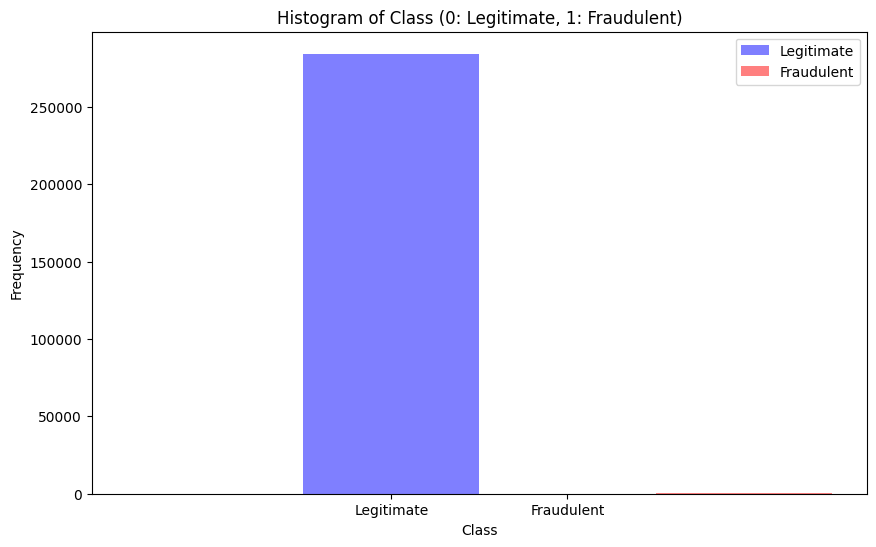

In [ ]:
# Plotting histograms for 'Class' column in 'legit' and 'fraud' subsets
plt.figure(figsize=(10, 6))

plt.hist(legit['Class'], bins=2, color='blue', alpha=0.5, label='Legitimate')
plt.hist(fraud['Class'], bins=2, color='red', alpha=0.5, label='Fraudulent')

plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of Class (0: Legitimate, 1: Fraudulent)')
plt.xticks([0.25, 0.75], ['Legitimate', 'Fraudulent'])
plt.legend()

plt.show()


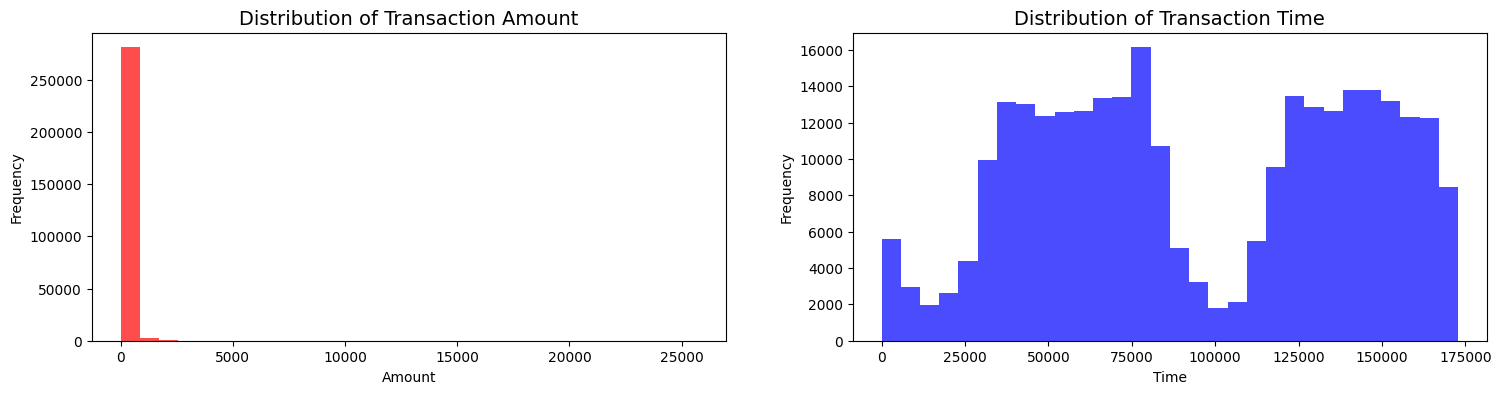

In [ ]:
# Set up the subplots
fig, ax = plt.subplots(1, 2, figsize=(18,4))

# Get values of 'Amount' and 'Time'
amount_val = credit_card_data['Amount'].values
time_val = credit_card_data['Time'].values

# Plot the distribution of 'Amount'
ax[0].hist(amount_val, bins=30, color='r', alpha=0.7)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlabel('Amount')
ax[0].set_ylabel('Frequency')

# Plot the distribution of 'Time'
ax[1].hist(time_val, bins=30, color='b', alpha=0.7)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Frequency')

# Show the plot
plt.show()


In [ ]:
#Statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291324
std         250.105041
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
#Comparing the mean value for both transaction
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000090,-0.000296,-0.000131,88.291324
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


###Undersampling

Building a sample dataset containing similiar distribution of normal transaction and Fraudlent transaction

note: Remember?? We had dimension of fraudlent transaction => 492x31

so why not use that to create new sample.

In [ ]:
#first lets take randomly 492 rows data from legit transaction we created earlier
legit_sample = legit.sample(n=492)

####Concatenating legit sample and fraud data

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
106455,69973.0,1.390181,-0.717998,1.168453,-0.743927,-1.464963,-0.230240,-1.282485,0.025026,-0.257556,...,0.410820,1.194706,-0.151676,-0.049720,0.407952,-0.013887,0.062651,0.029550,9.99,0
41328,40637.0,0.928428,-0.566764,0.207707,0.153875,0.525833,2.492199,-0.730959,0.731306,0.383776,...,0.230650,0.802465,-0.193829,-2.088998,0.252842,0.780960,0.043686,-0.005976,82.00,0
97073,66063.0,1.357335,-0.509496,0.677900,-0.727970,-1.213158,-0.842921,-0.698478,-0.021763,-0.943537,...,-0.041997,-0.294641,0.158856,0.505312,0.156136,-0.507686,0.003966,0.012486,4.13,0
92795,64109.0,-0.601251,1.255896,1.084574,-0.184366,0.266305,-0.494269,0.603235,0.080474,-0.508732,...,-0.259324,-0.622561,-0.065894,-0.038708,-0.080273,0.077985,0.351683,0.148049,2.69,0
85701,60894.0,1.110499,-1.411929,1.414927,-0.367083,-1.894787,0.709609,-1.690254,0.551372,0.521049,...,0.266706,0.789197,-0.091371,0.024590,0.241534,-0.059333,0.063968,0.021087,70.32,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

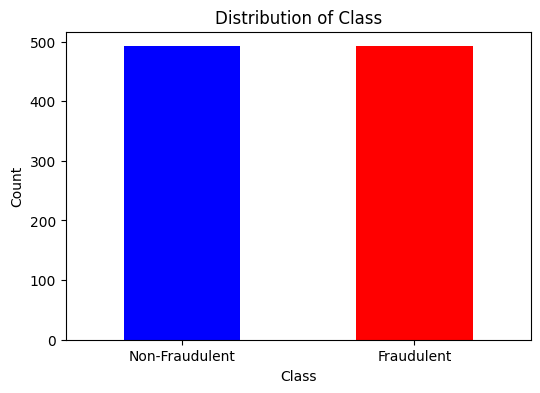

In [ ]:
# Get the class distribution
class_distribution = new_dataset['Class'].value_counts()

# Plot the distribution
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'], rotation=0)
plt.show()

###Lets do some scaling first for our new sample data
Since almost all of the column are scaled, only time and amount are not scaled, lets scale it as well.

In [ ]:
from sklearn.preprocessing import RobustScaler

# RobustScaler is less prone to outliers.

rob_scaler = RobustScaler()

new_dataset['scaled_amount'] = rob_scaler.fit_transform(new_dataset['Amount'].values.reshape(-1,1))
new_dataset['scaled_time'] = rob_scaler.fit_transform(new_dataset['Time'].values.reshape(-1,1))

new_dataset.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
new_dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
106455,1.390181,-0.717998,1.168453,-0.743927,-1.464963,-0.230240,-1.282485,0.025026,-0.257556,0.561411,...,1.194706,-0.151676,-0.049720,0.407952,-0.013887,0.062651,0.029550,0,-0.081574,-0.104955
41328,0.928428,-0.566764,0.207707,0.153875,0.525833,2.492199,-0.730959,0.731306,0.383776,-0.234260,...,0.802465,-0.193829,-2.088998,0.252842,0.780960,0.043686,-0.005976,0,0.645873,-0.434836
97073,1.357335,-0.509496,0.677900,-0.727970,-1.213158,-0.842921,-0.698478,-0.021763,-0.943537,0.794769,...,-0.294641,0.158856,0.505312,0.156136,-0.507686,0.003966,0.012486,0,-0.140772,-0.148922
92795,-0.601251,1.255896,1.084574,-0.184366,0.266305,-0.494269,0.603235,0.080474,-0.508732,-0.043807,...,-0.622561,-0.065894,-0.038708,-0.080273,0.077985,0.351683,0.148049,0,-0.155319,-0.170895
85701,1.110499,-1.411929,1.414927,-0.367083,-1.894787,0.709609,-1.690254,0.551372,0.521049,0.489449,...,0.789197,-0.091371,0.024590,0.241534,-0.059333,0.063968,0.021087,0,0.527882,-0.207047


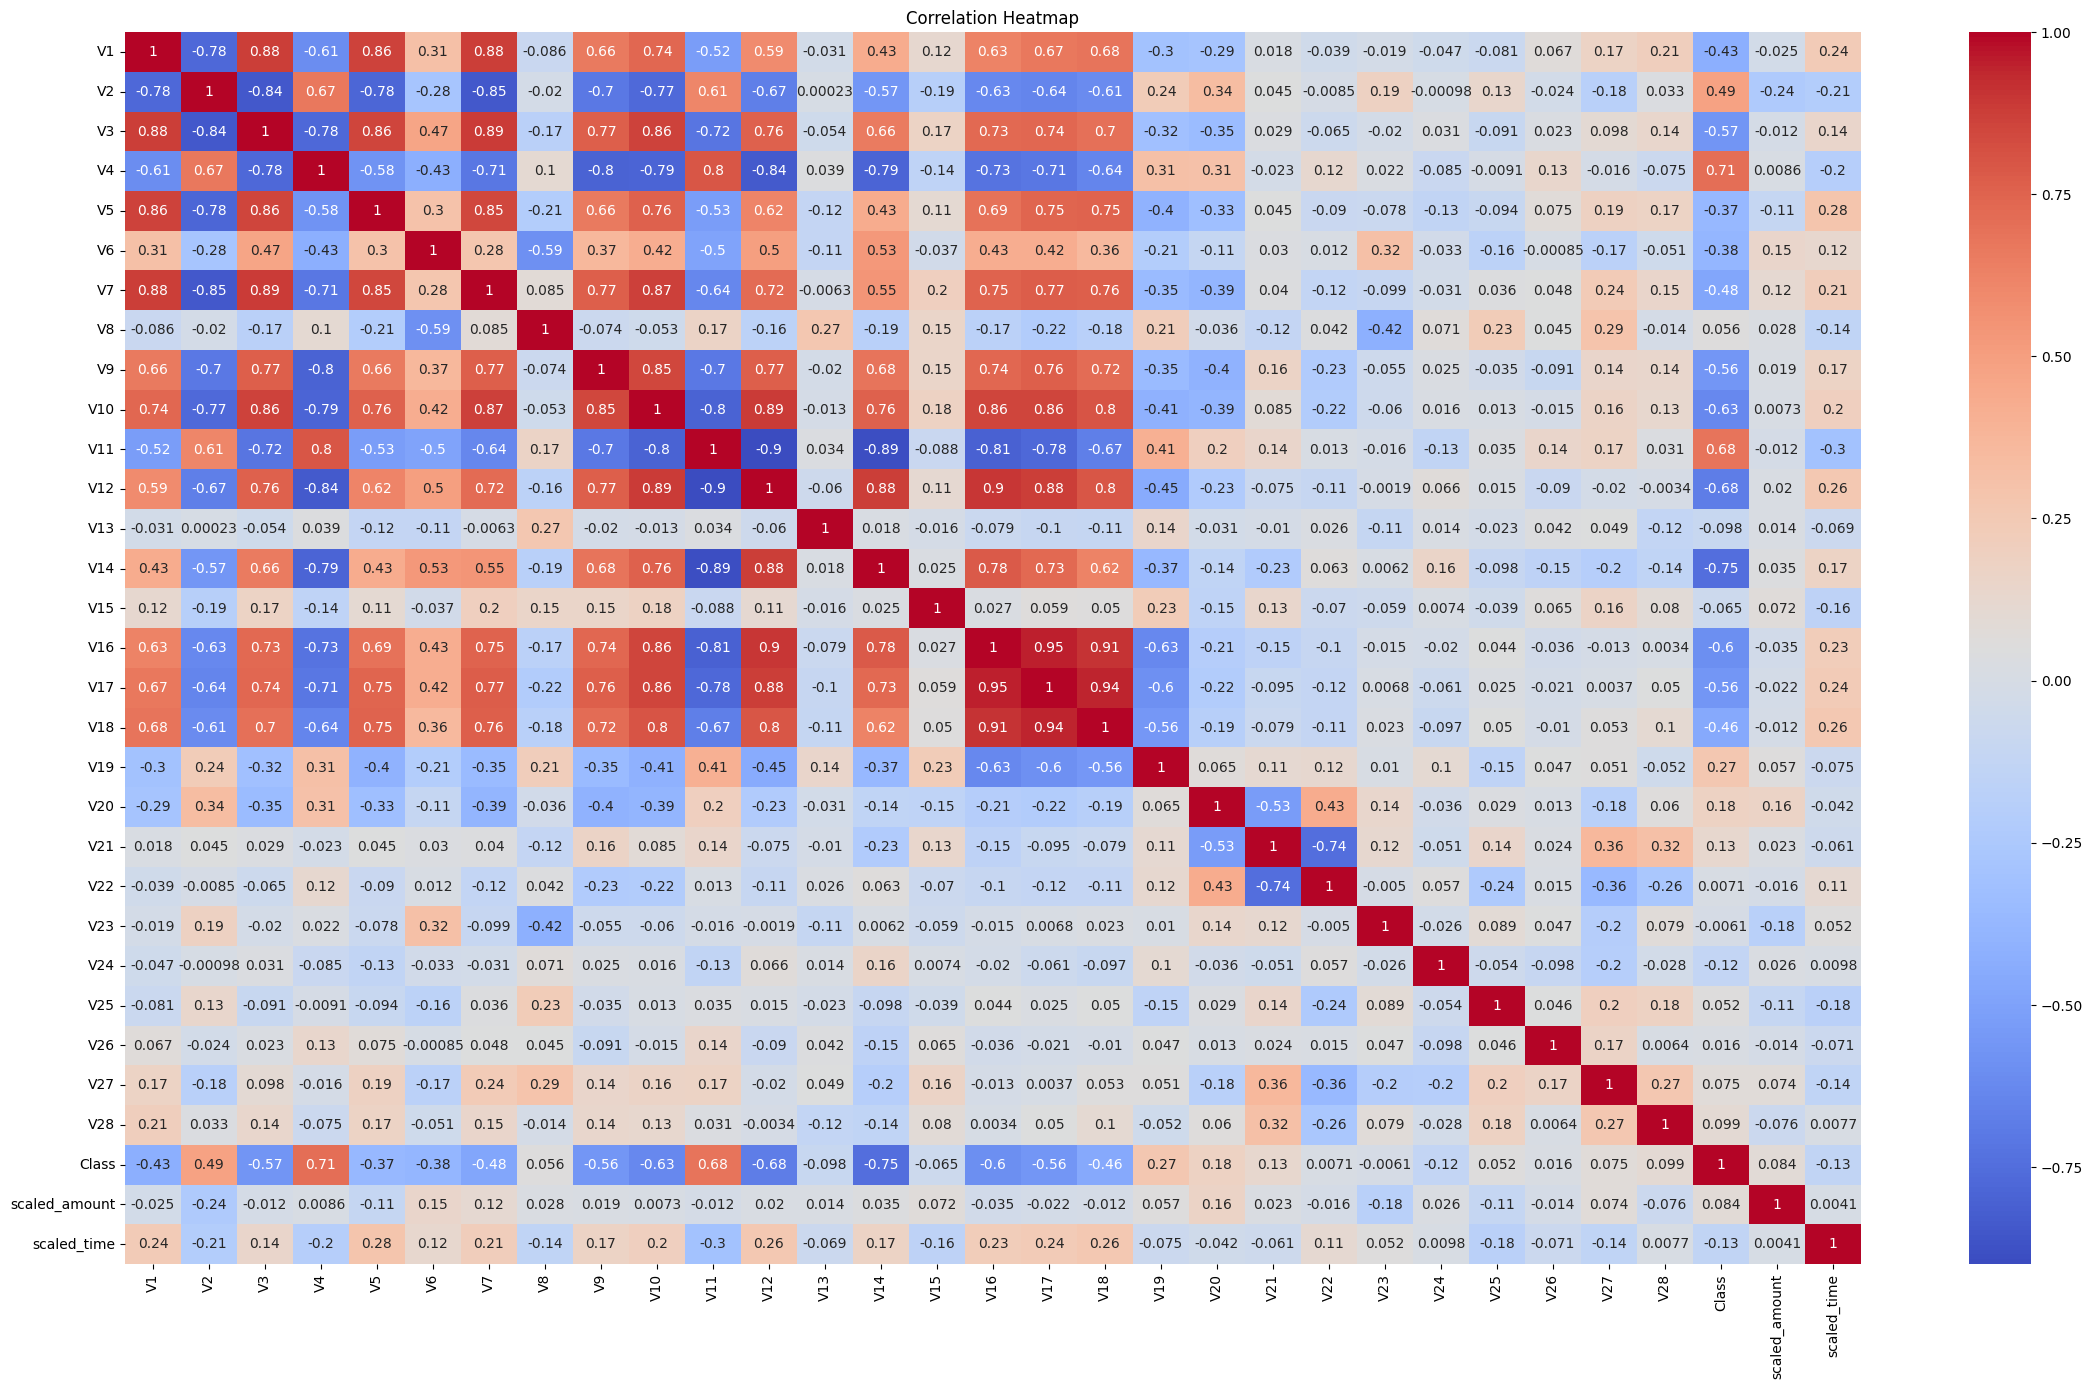

In [ ]:
corr = new_dataset.corr()
plt.figure(figsize=(28, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

###checking possible outlier in boxplot

<ipython-input-26-e42ae95e3405>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V14", data=new_dataset, palette=colors, ax=axes[0])
<ipython-input-26-e42ae95e3405>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V12", data=new_dataset, palette=colors, ax=axes[1])


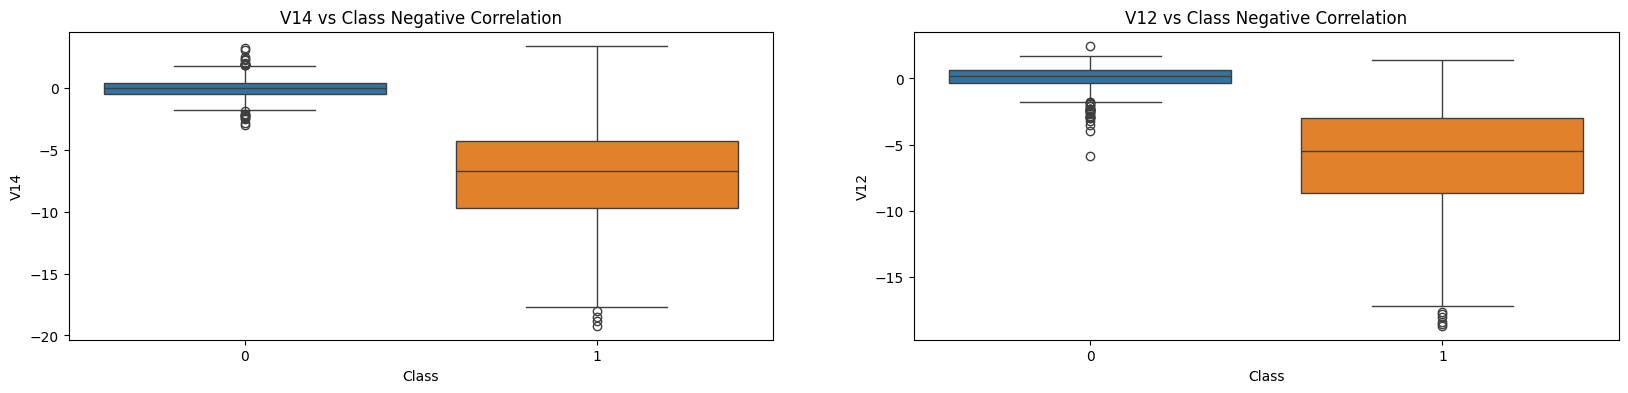

In [ ]:

# Define colors
colors = ['#1f77b4', '#ff7f0e']

# Plotting
f, axes = plt.subplots(ncols=2, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V14", data=new_dataset, palette=colors, ax=axes[0])
axes[0].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_dataset, palette=colors, ax=axes[1])
axes[1].set_title('V12 vs Class Negative Correlation')


plt.show()


<ipython-input-27-430da39409d6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V11", data=new_dataset, palette=colors, ax=axes[0])
<ipython-input-27-430da39409d6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V4", data=new_dataset, palette=colors, ax=axes[1])


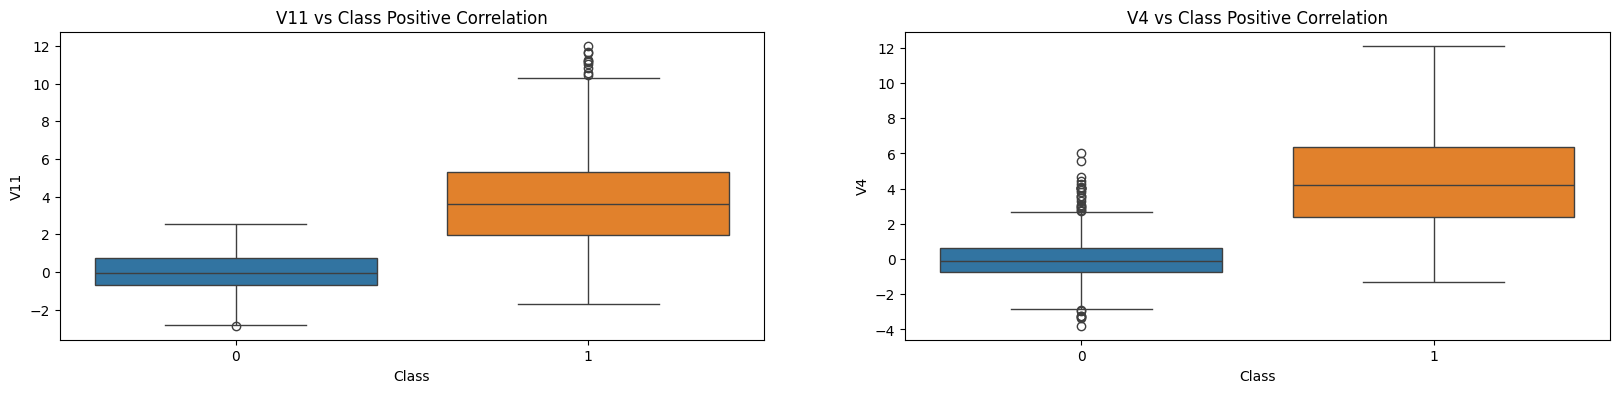

In [ ]:
f, axes = plt.subplots(ncols=2, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_dataset, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_dataset, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

plt.show()

In [ ]:
# Define a threshold for outliers (you can adjust this threshold as needed)
threshold = 1.5

# Calculate the IQR (Interquartile Range) for V14
Q1 = new_dataset['V14'].quantile(0.25)
Q3 = new_dataset['V14'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Filter out the outliers from the V14 column
filtered_data = new_dataset[(new_dataset['V14'] >= lower_bound) & (new_dataset['V14'] <= upper_bound)]

# Display the shape of the filtered dataset to see how many outliers were removed
print("Shape of filtered dataset:", filtered_data.shape)

# Calculate the number of outliers removed
outliers_removed = new_dataset.shape[0] - filtered_data.shape[0]
print("Number of outliers removed:", outliers_removed)



Shape of filtered dataset: (976, 31)
Number of outliers removed: 8


In [ ]:
filtered_data.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
Class,,,,,,,,,,,,,,,,,,,,,
0,-0.071768,0.013253,0.105639,-0.004563,-0.031956,-0.109906,0.031745,0.025988,0.003373,-0.018756,...,0.011175,-0.002638,-0.025683,0.031932,-0.026936,0.036908,0.018980,-0.007446,0.660027,0.158737
1,-4.788153,3.563035,-6.933821,4.469334,-3.145458,-1.366715,-5.503280,0.518699,-2.530287,-5.564408,...,0.694467,0.014065,-0.041236,-0.090220,0.034770,0.044356,0.143063,0.062707,1.072334,0.028062


In [ ]:
X= filtered_data.drop(columns='Class',axis=1)

In [ ]:
Y= filtered_data['Class']

In [ ]:
print(X)

              V1        V2        V3        V4        V5        V6        V7  \
106455  1.390181 -0.717998  1.168453 -0.743927 -1.464963 -0.230240 -1.282485   
41328   0.928428 -0.566764  0.207707  0.153875  0.525833  2.492199 -0.730959   
97073   1.357335 -0.509496  0.677900 -0.727970 -1.213158 -0.842921 -0.698478   
92795  -0.601251  1.255896  1.084574 -0.184366  0.266305 -0.494269  0.603235   
85701   1.110499 -1.411929  1.414927 -0.367083 -1.894787  0.709609 -1.690254   
...          ...       ...       ...       ...       ...       ...       ...   
279863 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
280143  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
280149 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
281144 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
281674  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695  0.223050   

              V8        V9       V10  .

In [ ]:
print(Y)

106455    0
41328     0
97073     0
92795     0
85701     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 976, dtype: int64


###split data into Training Data and Target Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y, random_state=2)

In [ ]:
print(X.shape,X_train.shape, X_test.shape)

(976, 30) (780, 30) (196, 30)


#Model Training

Using Logistic Regression: since it is generally used in binary classification problem

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
#Training the LogisticRegression Model with the training data
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

#Model Evaluation

Calculating Accuracy Score

In [ ]:
#Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print("Accuracy on Training data: ", training_data_accuracy)

Accuracy on Training data:  0.9474358974358974


In [ ]:
#Accuracy on Test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print("Accuracy on Test data: ", test_data_accuracy)

Accuracy on Test data:  0.9591836734693877


#END